<CENTER>
    <a href="http://opendata.atlas.cern" class="icons"><img src="../Assets/ATLASOD.gif" style="width:50%"></a>
</CENTER>

<CENTER><h1>Análisis del decamiento del bosón “Higgs” a través del canal dileptónico</h1></CENTER>

El siguiente análisis buscará eventos en los que el bosón de Higgs decae a través del canal dileptónico y los comparará con los eventos de fondo WW

In [1]:
import ROOT

Welcome to ROOTaaS 6.06/08


In [2]:
from math import fabs
from math import pi

In [3]:
## leemos las archivos de entrada via internet (URL del archivo)
#bgs = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/MC/mc_105985.WW.root")
#sig = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/MC/mc_161005.ggH125_WW2lep.root")

## o en las carpetas locales
bgs = ROOT.TFile.Open("/home/student/CEVALE2VE-repos-clases/Input/mc_105985.WW.root") #Datos "Background"
sig = ROOT.TFile.Open("/home/student/CEVALE2VE-repos-clases/Input/mc_161005.ggH125_WW2lep.root") #Datos "Signal"

In [4]:
c = ROOT.TCanvas("testCanvas","a first way to plot a variable",800,600)

In [5]:
t_bgs = bgs.Get("mini")
t_sig = sig.Get("mini")

In [6]:
h_bgs = ROOT.TH1F("variable_bgs","Numero de Leptones",4,0,4)
h2_bgs = ROOT.TH1F("variable2_bgs","Numero de Jets",10,0,10)
h3_bgs = ROOT.TH1F("variable3_bgs","Valor de la Missing Et",20,0,200)
h4_bgs = ROOT.TH1F("variable4_bgs","Valor del Pt de los dos primeros leptones",20,0,200)
h5_bgs = ROOT.TH1F("variable5_bgs","Valor del DeltaPhi(lepton-lepton)",18,0,180)
h6_bgs = ROOT.TH1F("variable6_bgs","Valor del DeltaPhi(Missing Et-2 Leptones)",18,0,180)

h_sig = ROOT.TH1F("variable_sig","Numero de Leptones",4,0,4)
h2_sig = ROOT.TH1F("variable2_sig","Numero de Jets",10,0,10)
h3_sig = ROOT.TH1F("variable3_sig","Valor de la Missing Et",20,0,200)
h4_sig = ROOT.TH1F("variable4_sig","Valor del Pt de los dos primeros leptones",20,0,200)
h5_sig = ROOT.TH1F("variable5_sig","Valor del DeltaPhi(lepton-lepton)",18,0,180)
h6_sig = ROOT.TH1F("variable6_sig","Valor del DeltaPhi(Missing Et-2 Leptones)",18,0,180) 

# Aplicamos el corte: "Número de leptones mayor a 1" y el corte:"Valor del DeltaPhi(Missing Et-2 Leptones) menor a 140°


In [7]:
n_bgs = 0
n_sig = 0

for event in t_bgs:
    
    if t_bgs.lep_n > 1:
        
        if fabs((t_bgs.lep_phi[0] - t_bgs.lep_phi[1])*180/pi) < 140:
        
            leadLepton_bgs  = ROOT.TLorentzVector()
            trailLepton_bgs = ROOT.TLorentzVector()
        
            # Definimos un vector TLorentz para cada lepton
            leadLepton_bgs.SetPtEtaPhiE(t_bgs.lep_pt[0]/1000., t_bgs.lep_eta[0], t_bgs.lep_phi[0], t_bgs.lep_E[0]/1000.)
            trailLepton_bgs.SetPtEtaPhiE(t_bgs.lep_pt[1]/1000., t_bgs.lep_eta[1], t_bgs.lep_phi[1], t_bgs.lep_E[1]/1000.)
            # Siguiente línea: suma de los dos vectores TLorentz descritos  (dividimos por 1000 para obtener valores en GeV)
            l12_bgs = leadLepton_bgs + trailLepton_bgs
                
            h_bgs.Fill(t_bgs.lep_n)
            h2_bgs.Fill(t_bgs.jet_n)
            h3_bgs.Fill(t_bgs.met_et/1000.) 
            h4_bgs.Fill(l12_bgs.Pt())  
            h5_bgs.Fill(fabs((t_bgs.lep_phi[0] - t_bgs.lep_phi[1])*180/pi))
            h6_bgs.Fill(fabs(((t_bgs.lep_phi[0] + t_bgs.lep_phi[1])/2 - t_bgs.met_phi)*180/pi)) 
            
            n_bgs += 1
            
for event in t_sig:
    
    if t_sig.lep_n > 1:
        
        if fabs((t_sig.lep_phi[0] - t_sig.lep_phi[1])*180/pi) < 140:
        
            leadLepton_sig  = ROOT.TLorentzVector()
            trailLepton_sig = ROOT.TLorentzVector()
                
            # Definimos un vector TLorentz para cada lepton
            leadLepton_sig.SetPtEtaPhiE(t_sig.lep_pt[0]/1000., t_sig.lep_eta[0], t_sig.lep_phi[0], t_sig.lep_E[0]/1000.)
            trailLepton_sig.SetPtEtaPhiE(t_sig.lep_pt[1]/1000., t_sig.lep_eta[1], t_sig.lep_phi[1], t_sig.lep_E[1]/1000.)
            # Siguiente línea: suma de los dos vectores TLorentz descritos  (dividimos por 1000 para obtener valores en GeV)
            l12_sig = leadLepton_sig + trailLepton_sig
        
            h_sig.Fill(t_sig.lep_n)
            h2_sig.Fill(t_sig.jet_n)
            h3_sig.Fill(t_sig.met_et/1000.) 
            h4_sig.Fill(l12_sig.Pt())
            h5_sig.Fill(fabs((t_sig.lep_phi[0] - t_sig.lep_phi[1])*180/pi))
            h6_sig.Fill(fabs(((t_sig.lep_phi[0] + t_sig.lep_phi[1])/2 - t_sig.met_phi)*180/pi)) 
            
            n_sig += 1
      
        
print "Done!"
print "Número de eventos 'background' =", n_bgs
print "Número de eventos 'signal' =", n_sig

Done!
Número de eventos 'background' = 31612
Número de eventos 'signal' = 54296


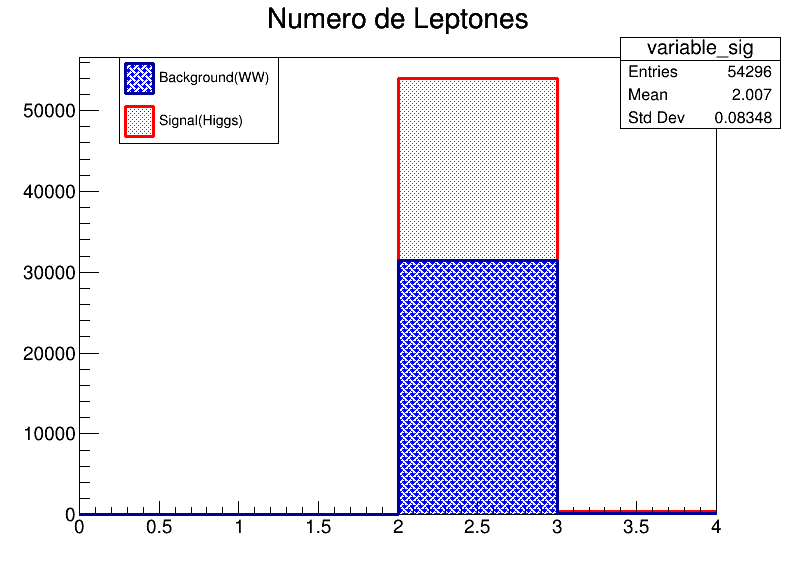

In [8]:
h_bgs.SetFillStyle(3008) #estilo canasta de mimbre
h_bgs.SetFillColor(4) #azul
h_sig.SetFillStyle(3003) #estilo puntos equidistantes
h_sig.SetFillColor(2) #rojo

legend=ROOT.TLegend(0.15,0.75,0.35,0.9)   
#coordenadas del cuadro de leyenda (coord.vert.izq, coord.hor.abajo, coord.vert.der, coord.hor.arriba)
legend.AddEntry(h_bgs,"Background(WW)","f")
legend.AddEntry(h_sig,"Signal(Higgs)","f")

h_sig.SetLineColor(2) #rojo

h_sig.Draw()
h_bgs.Draw("same")
legend.Draw()
c.Draw()

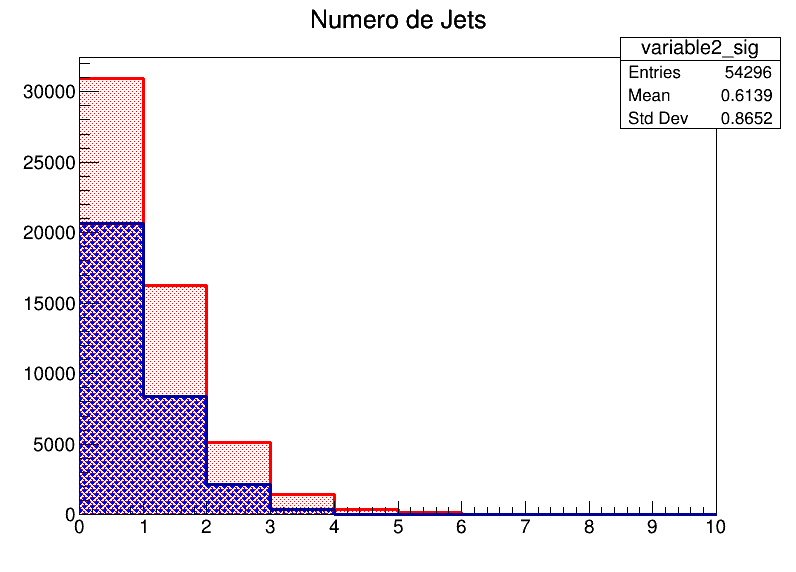

In [9]:
h2_bgs.SetFillStyle(3008)
h2_bgs.SetFillColor(4)
h2_sig.SetFillStyle(3003)
h2_sig.SetFillColor(2)

h2_sig.SetLineColor(2)

h2_sig.Draw()
h2_bgs.Draw("same")
c.Draw()


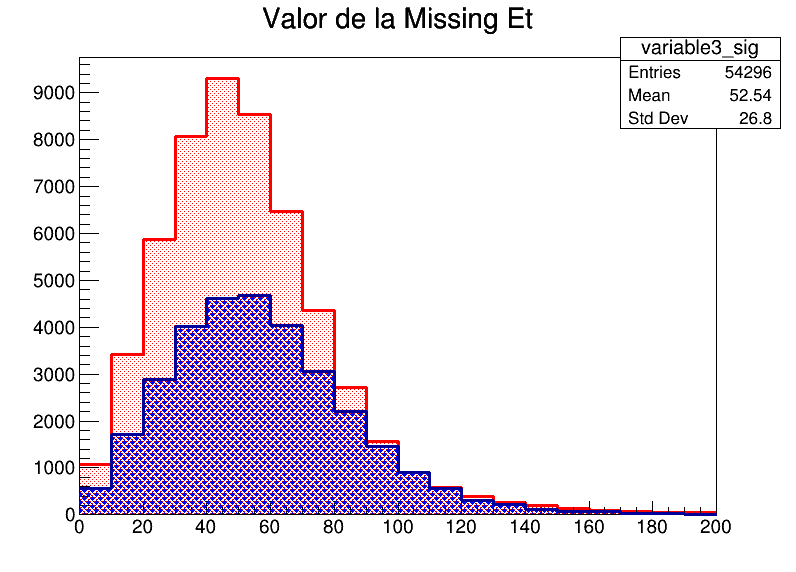

In [10]:
h3_bgs.SetFillStyle(3008)
h3_bgs.SetFillColor(4)
h3_sig.SetFillStyle(3003)
h3_sig.SetFillColor(2)

h3_sig.SetLineColor(2)

h3_sig.Draw()
h3_bgs.Draw("same")
c.Draw()

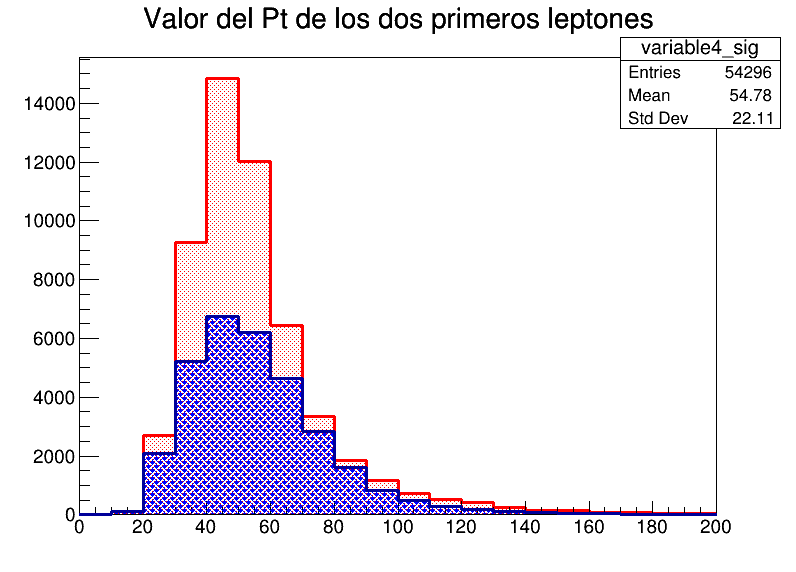

In [11]:
h4_bgs.SetFillStyle(3008)
h4_bgs.SetFillColor(4)
h4_sig.SetFillStyle(3003)
h4_sig.SetFillColor(2)

h4_sig.SetLineColor(2)

h4_sig.Draw()
h4_bgs.Draw("same")
c.Draw()

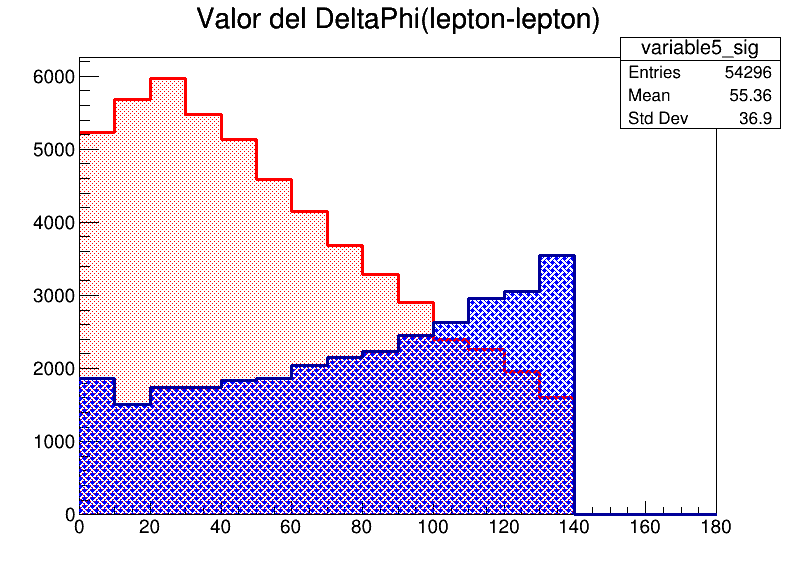

In [12]:
h5_bgs.SetFillStyle(3008)
h5_bgs.SetFillColor(4)
h5_sig.SetFillStyle(3003)
h5_sig.SetFillColor(2)

h5_sig.SetLineColor(2)

h5_sig.Draw()
h5_bgs.Draw("same")
c.Draw()

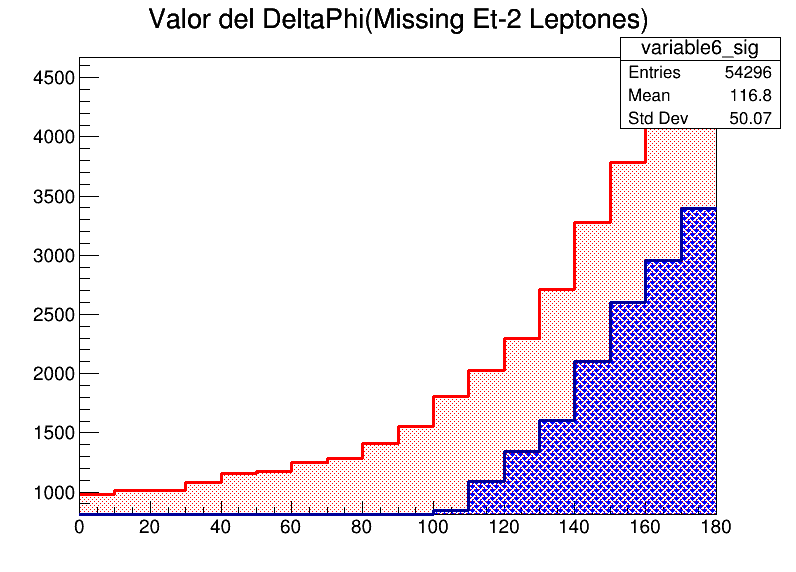

In [13]:
h6_bgs.SetFillStyle(3008)
h6_bgs.SetFillColor(4)
h6_sig.SetFillStyle(3003)
h6_sig.SetFillColor(2)

h6_sig.SetLineColor(2)

h6_sig.Draw()
h6_bgs.Draw("same")
c.Draw()

In [ ]:
#Para hacer los histogramas interactivos
#ROOT.enableJSVis()
#c.Draw()
#ROOT.disableJSVis() 